In [41]:
# Import Dependencies
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [42]:
# Read the csv file into a pandas DataFrame
HREmployee_data = pd.read_csv('../Resources/HREmployeeAttrition.csv')
HREmployee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [43]:
HREmployee_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [44]:
# Select our independent X , and our dependent y variable. 
y = HREmployee_data['Attrition']
X = HREmployee_data[['Age','DistanceFromHome','Education','JobSatisfaction','MonthlyIncome','PercentSalaryHike','PerformanceRating','StockOptionLevel','WorkLifeBalance','YearsSinceLastPromotion']]

In [45]:
# Confirm imbalance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
total = y.count()
attr = y[y==1].count()
no_attr = y[y==0].count()
print(f"Total: {total}")
print(f"Attrition: {attr} ({round(attr*100/total, 2)}%)")
print(f"No attrition: {no_attr} ({round(no_attr*100/total, 2)}%)")

Total: 1470
Attrition: 237 (16.12%)
No attrition: 1233 (83.88%)


### Imbalanced

In [46]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [47]:
# Confirm imbalance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
total = y_test.count()
attrition = y_test[y_test==1].count()
no_attrition = y_test[y==0].count()
print(f"Total: {total}")
print(f"Attrition: {attrition} ({round(attr*100/total, 2)}%)")
print(f"No attrition: {no_attrition} ({round(no_attr*100/total, 2)}%)")

Total: 294
Attrition: 58 (80.61%)
No attrition: 236 (419.39%)


In [48]:
# Create a Linear Regression model object
model= LogisticRegression(solver='liblinear')

In [49]:
# Train the model using the training datasets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [50]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

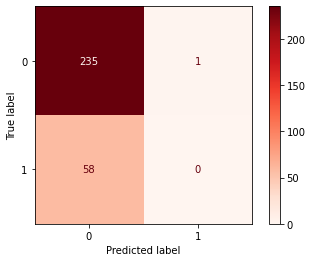

In [51]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

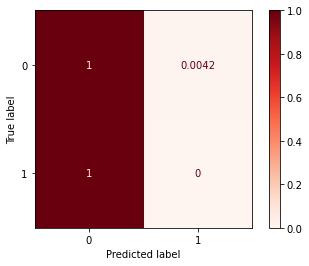

In [52]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [53]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=["No Attrition", "Attrition"]))

              precision    recall  f1-score   support

No Attrition       0.80      1.00      0.89       236
   Attrition       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.44       294
weighted avg       0.64      0.80      0.71       294



### Balanced

In [54]:
# Create our Validation training and testing datasets with balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [55]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
total = y_test.count()
attrition = y_test[y_test==1].count()
no_attrition = y_test[y==0].count()
print(f"Total: {total}")
print(f"Attrition: {attrition} ({round(attr*100/total, 2)}%)")
print(f"No attrition: {no_attrition} ({round(no_attr*100/total, 2)}%)")

Total: 294
Attrition: 47 (80.61%)
No attrition: 247 (419.39%)


In [56]:
# Create the Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [57]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [58]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

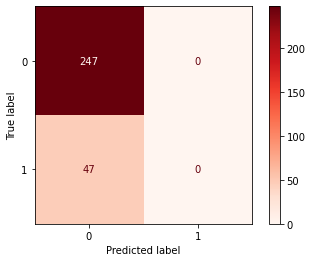

In [61]:
# Plot the Confusion Matrix values
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

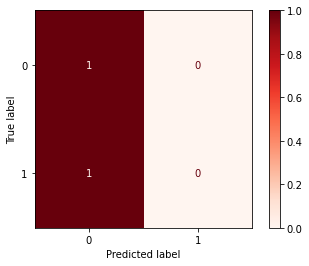

In [62]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [63]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["No Attrition", "Attrition"]))

              precision    recall  f1-score   support

No Attrition       0.84      1.00      0.91       247
   Attrition       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
